# **Zomato Restaurant Rating**

### **Objective:** 
- To make a ML model to predict the rating of a restaurant and how it may turn out in the future.

### **Dataset:** 
- The dataset provided by Zomato contains data of **9551** restaurants from all over the world currently on the app.
    - It contains the details about the restaurants and the rating it achieved finally.


### The flow of the case study is as below:

- Reading the data in python
- Defining the problem statement
- Identifying the Target variable
- Looking at the distribution of Target variable
- Basic Data exploration
- Feature Engineering
- Rejecting useless columns
- Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts)
- Feature Selection based on data distribution
- Outlier treatment
- Missing Values treatment
- Visual correlation analysis
- Statistical correlation analysis (Feature Selection)
- Converting data to numeric for ML
- Sampling and K-fold cross validation
- Trying multiple Regression algorithms
- Selecting the best Model
- Deploying the best model in production

### **Dataset**
- Contains 9551 restaurants details.

### **The business meaning of each column in the data**

- **Restaurant ID**: The id for each restaurant
- **Restaurant Name**: The brand/restaurant name
- **Country Code**: In which country the restaurant is operating
- **City**: In which city the restaurant is operating
- **Address**: What is the address of the restaurant
- **Locality**: What is the locality of the restaurant
- **Locality Verbose**: Detailed locality description
- **Longitude**: GPS longitude location
- **Latitude**: GPS latitude location
- **Cuisines**: Various type of food offered
- **Currency**: The business currency
- **Has Table booking**: Is advance table booking facility available?
- **Has Online delivery**: Does they take online food orders?
- **Is delivering now**: Is is open now?
- **Switch to order menu**: Whether switch to order menu is available?
- **Price range**: The price range of the restaurant
- **Votes**: The number of people who voted for the rating
- **Average Cost for two**: The typical cost for two people
- **Rating**: The final rating of the restaurant

In [1]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
import pandas as pd
import numpy as np
ZomatoData=pd.read_csv('../Datasets/ZomatoData.csv', encoding='latin')
print('Shape before deleting duplicate values:', ZomatoData.shape)

# Removing duplicate rows
ZomatoData=ZomatoData.drop_duplicates()
print('Shape After deleting duplicate values:', ZomatoData.shape)

# Printing sample data
# Observing the Quantitative/Categorical/Qualitative variables
ZomatoData.head(10)

Shape before deleting duplicate values: (9551, 19)
Shape After deleting duplicate values: (9551, 19)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,3,314,1100,4.8
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.5
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,4,270,4000,4.4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",Botswana Pula(P),No,No,No,No,4,365,1500,4.9
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",Botswana Pula(P),Yes,No,No,No,4,229,1500,4.8
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,Botswana Pula(P),No,No,No,No,3,336,1000,4.4
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",Botswana Pula(P),Yes,No,No,No,4,520,2000,4.0
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",Botswana Pula(P),Yes,No,No,No,4,677,2000,4.2
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",Botswana Pula(P),Yes,No,No,No,4,621,6000,4.9
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,Botswana Pula(P),Yes,No,No,No,3,532,1100,4.8


### **Defining the problem statement**:
To create a ML model which can predict the future Rating of a restaurant:
- **Target Variable**: Rating
- **Predictors**: location, menu, cost etc.
- Rating=1 Worst
- Rating=5 Best

### **Determining the type of Machine Learning**:
Based on the problem statement, we need to create a **supervised ML Regression model**, as the target variable is Continuous.


### **Observation from the distribution of Target Variable**:

- If the target variable's distribution is too skewed, then the predictive model will not be possible.
- Bell curve is desirable while slight positive or negative skewness is also fine.
- When performing Regression, making sure histograms looks like a bell curve or slightly skewed version of it is important.
    - Otherwise it impacts the Machine Learning Algorithms ability to learn all the scenarios.

<Axes: >

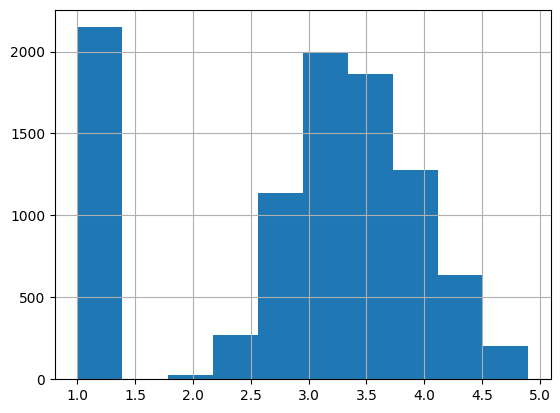

In [3]:
%matplotlib inline
# Creating Bar chart as the Target variable is Continuous
ZomatoData['Rating'].hist()

The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows for each type of values to learn from.

### **Basic Data Exploration**
- Step to:
    - Gauge the overall data
    - Volume of the data
    - Types of columns in the data

- Initial assessment of the data being done to identify which columns are Quantitative, Categorical or Qualitative.

- Checking how each column would affect the values of the Target Variable.
    - If the column affects the final answer then remove the column.


#### There are four commands which are used for Basic data exploration in Python

- **head()** : This helps to see a few sample rows of the data
- **info()** : This provides the summarized information of the data
- **describe()** : This provides the descriptive statistical details of the data
- **nunique()**: This helps us to identify if a column is categorical or continuous

In [4]:
# Looking at sample rows in the data
ZomatoData.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,3,314,1100,4.8
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.5
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,4,270,4000,4.4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",Botswana Pula(P),No,No,No,No,4,365,1500,4.9
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",Botswana Pula(P),Yes,No,No,No,4,229,1500,4.8


- Observing the summarized information of the data
- Data types, Missing values based on the number of null values Vs total rows, etc.
- Remove those variables from data which have too many missing values (Missing Values > 30%)
- Remove Qualitative variables which cannot be used in Machine Learning

In [5]:
ZomatoData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Currency              9551 non-null   object 
 11  Has Table booking     9551 non-null   object 
 12  Has Online delivery   9551 non-null   object 
 13  Is delivering now     9551 non-null   object 
 14  Switch to order menu  9551 non-null   object 
 15  Price range          

In [6]:
# Looking at the descriptive statistics of the data
ZomatoData.describe(include='all')

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating
count,9.551000e+03,9551,9551.000000,9551,9551,9551,9551,9551.000000,9551.000000,9542,9551,9551,9551,9551,9551,9551.000000,9551.000000,9551.000000,9551.000000
unique,NaN,7446,NaN,141,8918,1208,1265,NaN,NaN,1825,12,2,2,2,1,NaN,NaN,NaN,NaN
top,NaN,Cafe Coffee Day,NaN,New Delhi,"Dilli Haat, INA, New Delhi",Connaught Place,"Connaught Place, New Delhi",NaN,NaN,North Indian,Indian Rupees(Rs.),No,No,No,No,NaN,NaN,NaN,NaN
freq,NaN,83,NaN,5473,11,122,122,NaN,NaN,936,8652,8393,7100,9517,9551,NaN,NaN,NaN,NaN
mean,9.051128e+06,NaN,18.365616,NaN,NaN,NaN,NaN,64.126574,25.854381,NaN,NaN,NaN,NaN,NaN,NaN,1.804837,156.909748,1199.210763,2.891268
std,8.791521e+06,NaN,56.750546,NaN,NaN,NaN,NaN,41.467058,11.007935,NaN,NaN,NaN,NaN,NaN,NaN,0.905609,430.169145,16121.183073,1.128845
min,5.300000e+01,NaN,1.000000,NaN,NaN,NaN,NaN,-157.948486,-41.330428,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,1.000000
25%,3.019625e+05,NaN,1.000000,NaN,NaN,NaN,NaN,77.081343,28.478713,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,5.000000,250.000000,2.500000
50%,6.004089e+06,NaN,1.000000,NaN,NaN,NaN,NaN,77.191964,28.570469,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,31.000000,400.000000,3.200000
75%,1.835229e+07,NaN,1.000000,NaN,NaN,NaN,NaN,77.282006,28.642758,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,131.000000,700.000000,3.700000


- Finding unique values for each column
- To understand which column is categorical and which one is Continuous
- Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous

In [7]:
ZomatoData.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Votes                   1012
Average Cost for two     140
Rating                    33
dtype: int64

### **Basic Data Exploration Results**

- **Restaurant ID**: Qualitative. Rejected.
- **Restaurant Name**: Qualitative. Rejected.
- **Country Code**: Categorical. Selected.
- **City**: Categorical. Rejected. Too many unique levels, hence it will cause high dimensionality
- **Address**: Qualitative. Rejected.
- **Locality**: Qualitative. Rejected.
- **Locality Verbose**: Qualitative. Rejected.
- **Longitude**: Continuous. Selected. This represents the location of restaurant
- **Latitude**: Continuous. Selected. This represents the location of restaurant
- **Cuisines**: Qualitative. Rejected. A new feature can be engineered from it.
- **Currency**: Categorical. Selected.
- **Has Table booking**: Categorical. Selected.
- **Has Online delivery**: Categorical. Selected.
- **Is delivering now**: Categorical. Selected.
- **Switch to order menu**: Categorical. Selected.
- **Price range**: Categorical. Selected.
- **Votes**: Continuous. Selected.
- **Average Cost for two**: Continuous. Selected.
- **Rating**: Continuous. Selected. This is the **Target Variable!**

### **Feature Engineering**

- Checking all the columns and identifying which are not useful in predictive analysis because these variables are qualitative.

- Each row of such columns would have a different string value, thus the ML algorithms cannot learn anything from them as each row has a different description and so general rule can be created from such columns.

- In columns like 'Data', we can extract data like month, week, quarter, etc which becomes categorical feature.

- Also from 'address' repetitive information from like zip, loyalty, etc, can be extracted, but if the number of unqiue values in them is too high ( > 50) then would create trouble for ML algorithms later.
    - Data dimensionality increases while converting such columns to dummy variables.

- For 'Cusines' in the datam column cannot be used directly because it will generate 1825 dummy vriables.
    - Thus we can count the number of cuisines offered.

In [8]:
# Function to count the number of cuisines
def cuisine_counter(inpStr):
    NumCuisines=len(str(inpStr).split(','))
    return(NumCuisines)

In [9]:
# Creating a new feature in data
ZomatoData['CuisineCount']=ZomatoData['Cuisines'].apply(cuisine_counter)
ZomatoData.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating,CuisineCount
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,3,314,1100,4.8,3
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.5,1
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,4,270,4000,4.4,4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",Botswana Pula(P),No,No,No,No,4,365,1500,4.9,2
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",Botswana Pula(P),Yes,No,No,No,4,229,1500,4.8,2


### **Removing useless columns from the data**

In [10]:
# Deleting those columns which are not useful in predictive analysis because these variables are qualitative
UselessColumns = ['Restaurant ID', 'Restaurant Name','City','Address',
                  'Locality', 'Locality Verbose','Cuisines']
ZomatoData = ZomatoData.drop(UselessColumns,axis=1)
ZomatoData.head()

,Country Code,Longitude,Latitude,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating,CuisineCount
0,162,121.027535,14.565443,Botswana Pula(P),Yes,No,No,No,3,314,1100,4.8,3
1,162,121.014101,14.553708,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.5,1
2,162,121.056831,14.581404,Botswana Pula(P),Yes,No,No,No,4,270,4000,4.4,4
3,162,121.056475,14.585318,Botswana Pula(P),No,No,No,No,4,365,1500,4.9,2
4,162,121.057508,14.584450,Botswana Pula(P),Yes,No,No,No,4,229,1500,4.8,2


### **Visual Exploratory Data Analysis**
- Categorical variables: Bar plot
- Continuous variables: Histogram


### **Visualize distribution of all the Categorical Predictor variables in the data using bar plots**:

- Categorical variable in the data can be spotted by looking at the unique values in them.
- A categorical variable contains less than 20 unique values and there is repetition of values, thus data can be grouped by those unique values.

**Categorical Predictors**: 'Country Code', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu','Price range'

In [11]:
# Function to plot bar charts for multiple columns at once
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

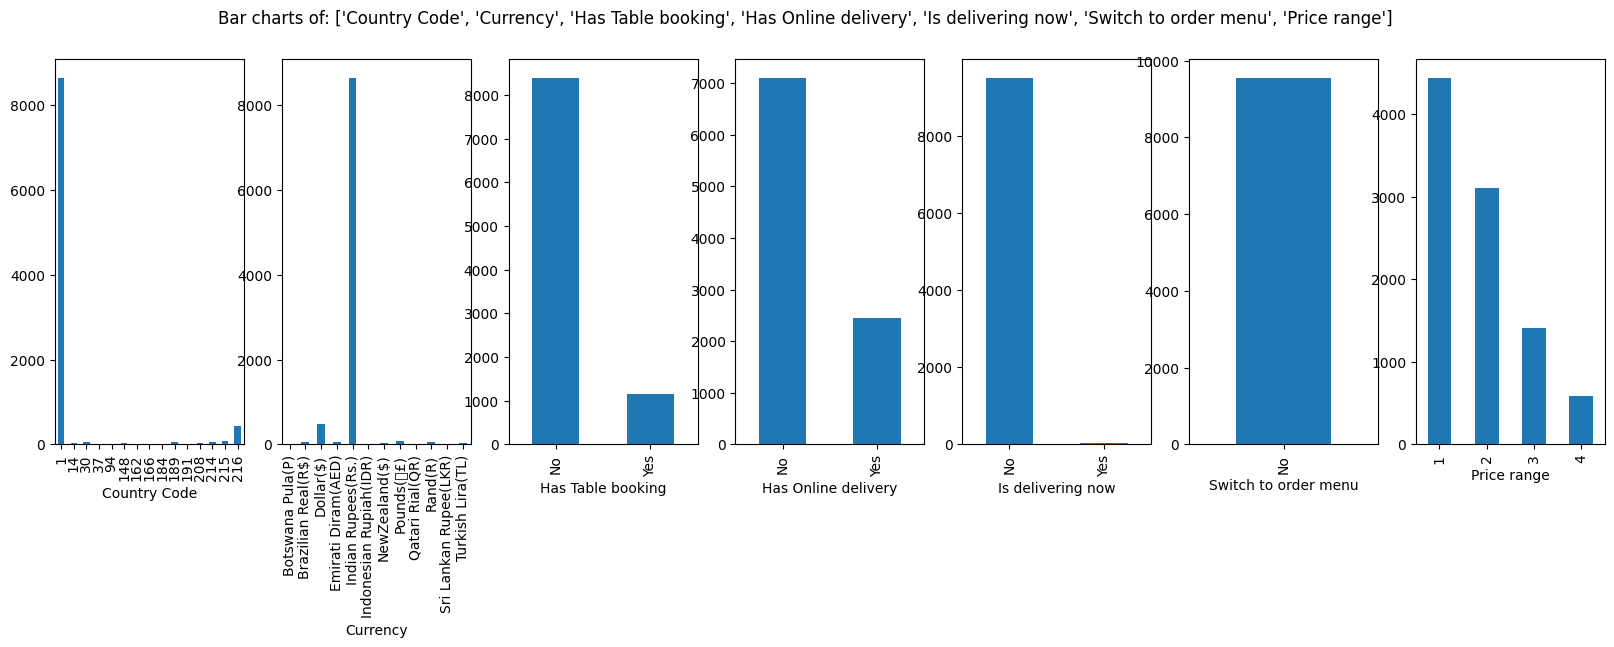

In [12]:
# Calling the function
PlotBarCharts(inpData=ZomatoData, colsToPlot=[
    'Country Code', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now',
    'Switch to order menu','Price range'])

### **Bar Charts Interpretation**

- The bar charts represent the frequencies of each category in the Y-axis and the category name in the X-axis.
- In ideal bar chart, each category has comparable frequency. Hence, there are enough rows for each category in the data for the ML algorithms to learn from.
- If there is a column which shows too skewed distribution where there is only one dominant bar and the other categories are present with very low frequency, it may indicate that the data is not suitable for the ML model to learn.
    - Correlation analysis section can be used here and a final call can be taken to select or reject the column.
-  "Country Code", "Currency", "is delivering now" and "Switch to order menu" columns in data is skewed, as here just one bar which is dominating and other categories have very less rows.
    - Such columns may not be correlated with the target variable but logically it can be a factor in explaining demand on a particular day.

### **Selected Categorical Variables**: 
('Has Table booking', 'Has Online delivery', 'Price range')


### **Visualize distribution of all the Continuous Predictor variables in the data using histograms**
There are four continuous predictor variables:

( 'Longitude', 'Latitude','Votes', and 'Average Cost for two')

array([[<Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Latitude'}>],
       [<Axes: title={'center': 'Votes'}>,
        <Axes: title={'center': 'Average Cost for two'}>]], dtype=object)

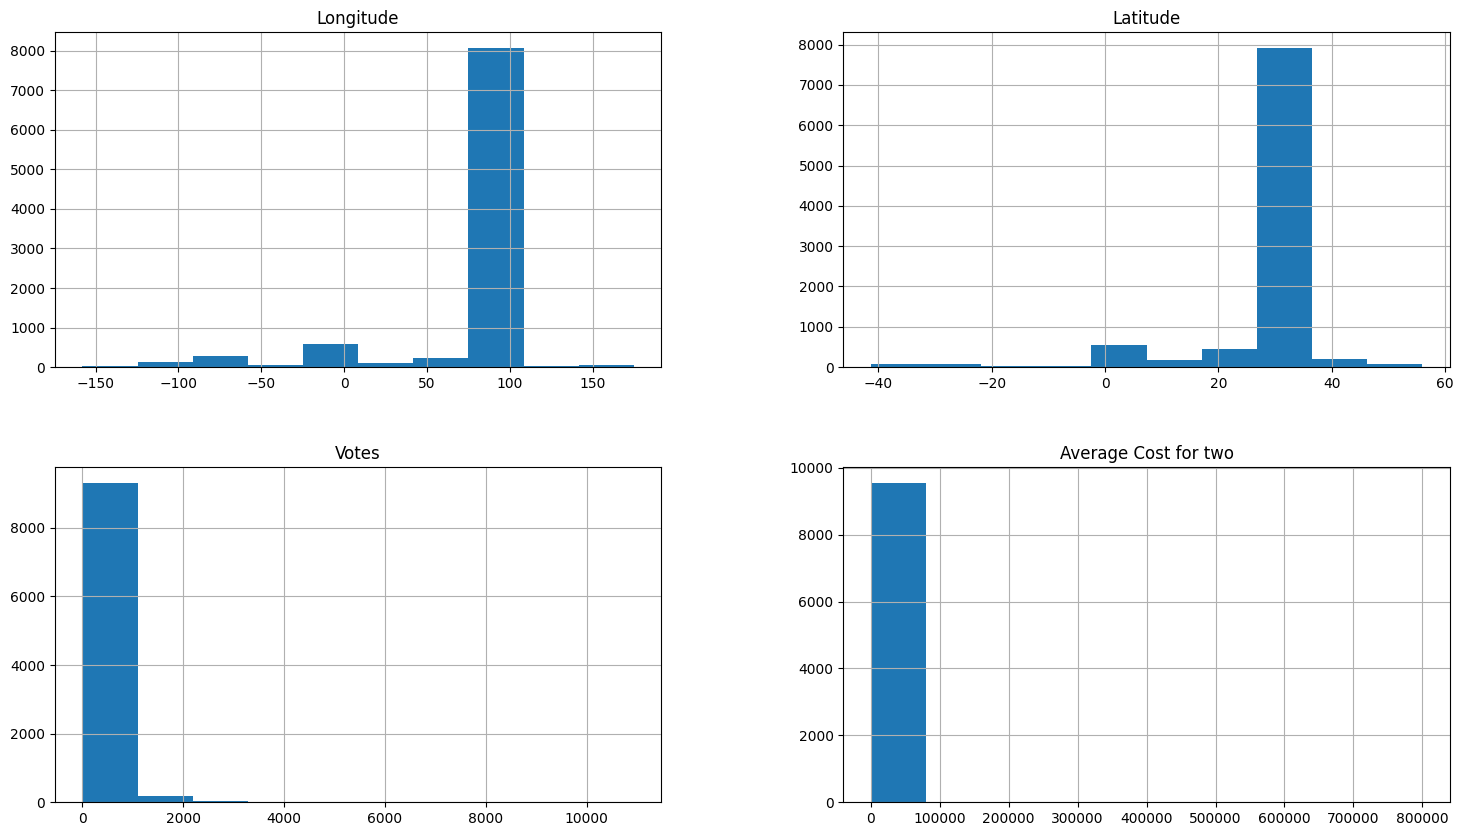

In [13]:
# Plotting histograms of multiple columns together
ZomatoData.hist(['Longitude', 'Latitude', 
                 'Votes', 'Average Cost for two'], figsize=(18,10))

### **Histogram Interpretation**:

- Histogram shows the distribution for a single continuous variable.
- The X-axis shows the range of values and Y-axis represent the number of values in that range.
- In the above histogram of "Votes", there are around 9K rows in that data having values between 0 to 1000.
- The ideal outcome for histogram is a bell curve or slightly skewed curve.
- If there is too much skewness, then outlier treatment should be donea dn that column should be re-examined, or simply reject the column if it is not useful.

### **Selected Continuous Variables**: 
- **Longitude** : Selected. The distribution is good.
- **Latitude**: Selected. The distribution is good.
- **Votes**: Selected. Outliers seen beyond 300000, need to treat them.
- **Average Cost for two**: Selected. Outliers seen beyond 4000, need to treat them.

### **Outlier Treatment**

- Outliers are extreme values in the data which are significantly different from the rest of the data points and can be seen as the tails in the histogram.

- Outlier must be treated one column at a time, as the treatments is slightly different for each column.

#### **Why to remove the outliers**

- Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

- Options to treat outlier in the data:
    - 1. Delete the outlier record, only if there are just few rows lost.
    - 2. Impute the outlier values with a logical business value.

In [14]:
# Finding nearest values to 4000 mark
ZomatoData['Votes'][ZomatoData['Votes']<4000].sort_values(ascending=False)

7863    3986
821     3848
3992    3697
3119    3591
1861    3569
        ... 
4801       0
4803       0
4805       0
4807       0
4784       0
Name: Votes, Length: 9532, dtype: int64

Above result shows the nearest logical value is 3986, hence, replacing any value above 4000 with it.

In [15]:
# Replacing outliers with nearest possibe value
ZomatoData['Votes'][ZomatoData['Votes']>4000] =3986

**Replacing outliers for 'Average Cost for two'**

In [16]:
# Finding nearest values to 50000 mark
ZomatoData['Average Cost for two'][ZomatoData['Average Cost for two']<50000].sort_values(ascending=False)

7543    8000
4088    7000
4087    6500
7494    6000
7538    6000
        ... 
85         0
87         0
240        0
397        0
9242       0
Name: Average Cost for two, Length: 9530, dtype: int64

Result shows the nearest logical value is 8000, hence, replacing any value above 50000 with it.

In [17]:
# Replacing outliers with nearest possibe value
ZomatoData['Average Cost for two'][ZomatoData['Average Cost for two']>50000] =8000

### **Visualizing distribution after outlier treatment**
- The distribution has improved after the outlier treatment. 
- There is still a tail but it is thick, that means there are many values in that range, hence, it is acceptable.

array([[<Axes: title={'center': 'Votes'}>,
        <Axes: title={'center': 'Average Cost for two'}>]], dtype=object)

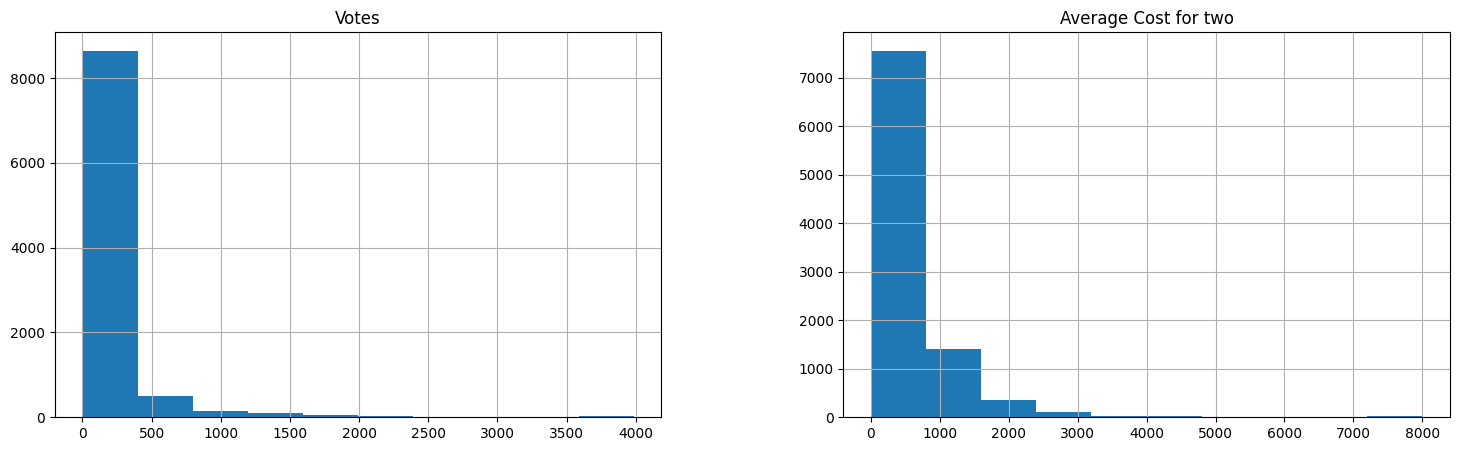

In [18]:
ZomatoData.hist(['Votes', 'Average Cost for two'], figsize=(18,5))

#### **Missing values treatment**
- Missing values are treated for each column separately.

- If a column has more than 30% data missing, then missing value treatment cannot be done. That column must be rejected because too much information is missing.


There are below options for treating missing values in data.

- Delete the missing value rows if there are only few records
- Impute the missing values with MEDIAN value for continuous variables
- Impute the missing values with MODE value for categorical variables
- Interpolate the values based on nearby values
- Interpolate the values based on business logic

In [19]:
# Finding how many missing values are there for each column
ZomatoData.isnull().sum()

Country Code            0
Longitude               0
Latitude                0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Votes                   0
Average Cost for two    0
Rating                  0
CuisineCount            0
dtype: int64

No missing values in this data.

### **Feature Selection**
- Choosing the best columns(Features) which are correlated to the Target variable. 
- This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.

#### **Visual exploration of relationship between variables**
- Continuous Vs Continuous ---- Scatter Plot
- Categorical Vs Continuous---- Box Plot
- Categorical Vs Categorical---- Grouped Bar Plots

#### **Statistical measurement of relationship strength between variables**
- Continuous Vs Continuous ---- Correlation matrix
- Categorical Vs Continuous---- ANOVA test
- Categorical Vs Categorical--- Chi-Square test


Target variable is Continuous, hence below two scenarios
- Continuous Target Variable Vs Continuous Predictor
- Continuous Target Variable Vs Categorical Predictor

### **Relationship exploration: Continuous Vs Continuous -- Scatter Charts**
When the Target variable is continuous and the predictor is also continuous, we can visualize the relationship between the two variables using scatter plot and measure the strength of relation using pearson's correlation value.

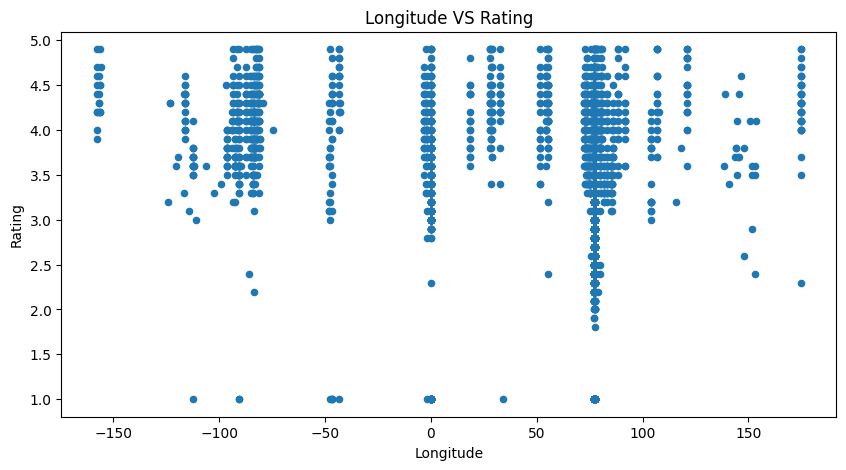

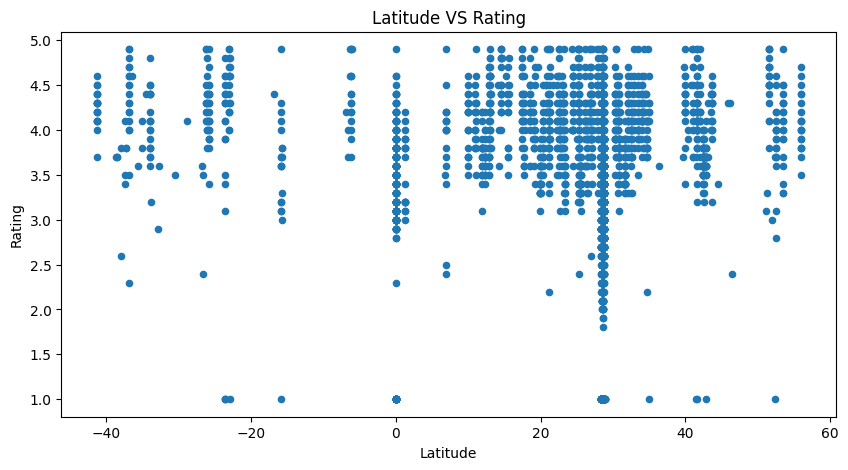

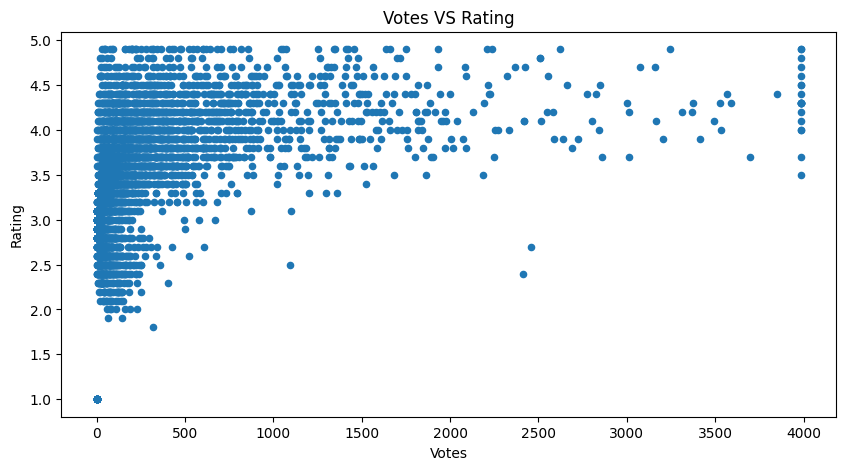

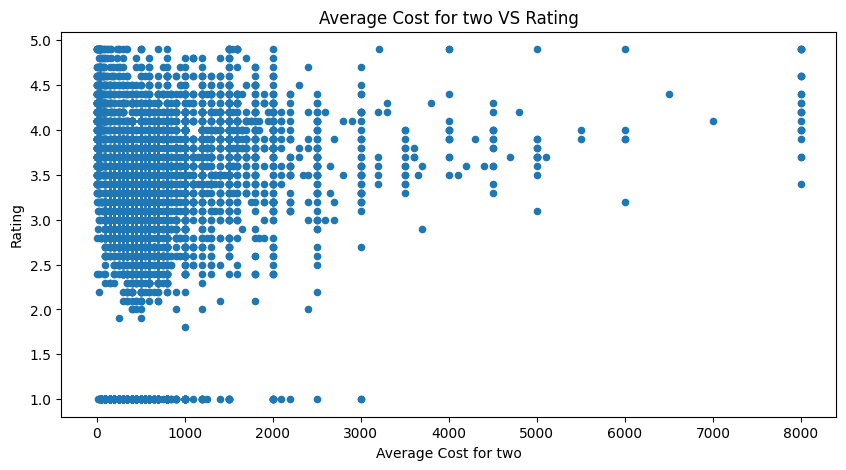

In [20]:
ContinuousCols=['Longitude', 'Latitude', 'Votes', 'Average Cost for two']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    ZomatoData.plot.scatter(x=predictor, y='Rating', figsize=(10,5), title=predictor+" VS "+ 'Rating')

### **Scatter charts interpretation**
There could be three scenarios

1. **Increasing Trend**: This means both variables are positively correlated. In simpler terms, they are directly proportional to each other, if one value increases, other also increases. This is good for ML!

2. **Decreasing Trend**: This means both variables are negatively correlated. In simpler terms, they are inversely proportional to each other, if one value increases, other decreases. This is also good for ML!

3. **No Trend**: You cannot see any clear increasing or decreasing trend. This means there is no correlation between the variables. Hence the predictor cannot be used for ML.

### **Statistical Feature Selection (Continuous Vs Continuous) using Correlation value**
Pearson's correlation coefficient can simply be calculated as the covariance between two features  `x` and  `y` (numerator) divided by the product of their standard deviations (denominator):

<html>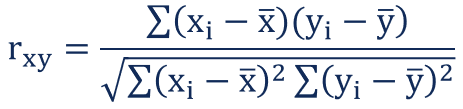</html>

- This value can be calculated only between two numeric columns
- Correlation between:
    - **[-1,0)** means inversely proportional -> the scatter plot will show a downward trend
    - **(0,1]** means directly proportional -> the scatter plot will show a upward trend
    - **near {0}** means No relationship, the scatter plot will show no clear trend.
    - If Correlation value between two variables is **> 0.5** in magnitude, it indicates good relationship the **sign does not matter**
- We observe the correlations between Target variable and all other predictor variables(s) to check which columns/features/predictors are actually related to the target variable in question

In [21]:
# Calculating correlation matrix
ContinuousCols=['Rating','Longitude', 'Latitude', 'Votes', 'Average Cost for two']

# Creating the correlation matrix
CorrelationData=ZomatoData[ContinuousCols].corr()
CorrelationData

,Rating,Longitude,Latitude,Votes,Average Cost for two
Rating,1.000000,-0.145930,-0.019806,0.385249,0.248981
Longitude,-0.145930,1.000000,0.043207,-0.101381,0.210272
Latitude,-0.019806,0.043207,1.000000,-0.019687,-0.064748
Votes,0.385249,-0.101381,-0.019687,1.000000,0.245662
Average Cost for two,0.248981,0.210272,-0.064748,0.245662,1.000000


In [23]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected like in this case
CorrelationData['Rating'][abs(CorrelationData['Rating']) > 0.2 ]

Rating                  1.000000
Votes                   0.385249
Average Cost for two    0.248981
Name: Rating, dtype: float64

Final selected Continuous columns: **'Votes'**, **'Average Cost for two'**

### **Relationship exploration: Categorical Vs Continuous --Box Plots**

When:
- **Target -> Continuous** and **(Predictor -> Categorical)**

Then we analyze the relation using Boxplots and measure the strength of relation using ANOVA test.

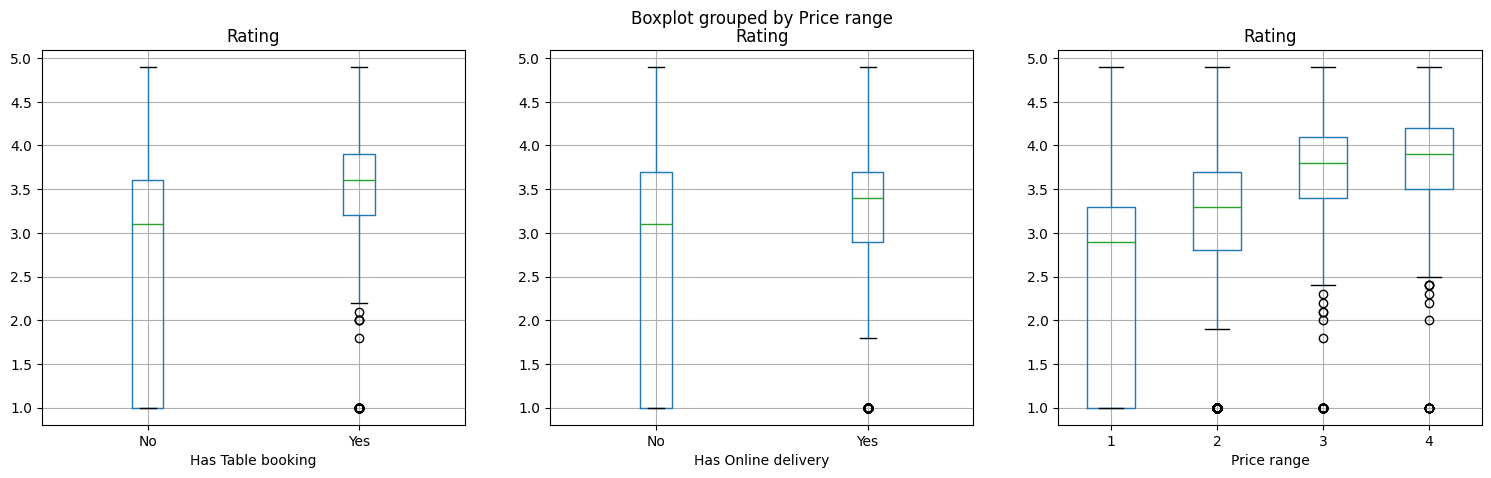

In [24]:
# Box plots for Categorical Target Variable "Rating" and continuous predictors
CategoricalColsList=['Has Table booking', 'Has Online delivery', 'Price range']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Rating"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    ZomatoData.boxplot(column='Rating', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

### **Box-Plots Interpretation**

What to look in these box plots:
- These plots give an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.
- If the distribution looks similar for each category (Boxes are in same line), that means the continuous variable has no effect on the target variable.
    - Hence, the variables are not correlated to each other.
- If the distribution is different for each category (the boxes are not in the same line),
    - Variables might not be correlated with cnt.

### **Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test**

Analysis of variance (ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable.
- Assumption Null Hypothesis (H0):
    - There is NO relation between the given variable (i.e. The average (mean) values of the numeric Target Variable is same for all the group in the Predictor variable).
- ANOVA Test result: Probability of H0 being true.

In [27]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('ANOVA Results \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [28]:
# Calling the function to check which categorical variables are correlated with target
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['Has Table booking', 'Has Online delivery', 'Price range']
FunctionAnova(inpData=ZomatoData, 
              TargetVariable='Rating', 
              CategoricalPredictorList=CategoricalPredictorList)

ANOVA Results 

Has Table booking is correlated with Rating | P-Value: 3.9393041304297214e-82
Has Online delivery is correlated with Rating | P-Value: 1.695258742057596e-92
Price range is correlated with Rating | P-Value: 0.0


['Has Table booking', 'Has Online delivery', 'Price range']

- The result of ANOVA confirm our visual analysis using box plots above.
- All categorical variables are correlated with the Target variable.

**Final selected Categorical columns:**
- 'Has Table Booking', 'Has Online delivery', 'Price range'

### **Selecting final predictors for Machine Learning**
- Based on the above tests, selecting the final columns for machine learning.

In [29]:
SelectedColumns=['Votes','Average Cost for two','Has Table booking',
                 'Has Online delivery','Price range']

# Selecting final columns
DataForML=ZomatoData[SelectedColumns]
DataForML.head()

,Votes,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,314,1100,Yes,No,3
1,591,1200,Yes,No,3
2,270,4000,Yes,No,4
3,365,1500,No,No,4
4,229,1500,Yes,No,4


In [30]:
# Saving this final data for reference during deployment
DataForML.to_pickle('RestaurantDataForML.pkl')

### **Data Pre-processing for Machine Learning**
List of steps performed on predictor variables before data can be used for machine learning

1. Converting each Ordinal Categorical columns to numeric
2. Converting Binary nominal Categorical columns to numeric using 1/0 mapping
3. Converting all other nominal categorical columns to numeric using pd.get_dummies()
4. Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks

- In this data there is no Ordinal categorical variable which is in string format.

### **Converting the binary nominal variable to numeric using 1/0 mapping**

In [31]:
# Converting the binary nominal variable sex to numeric
DataForML['Has Table booking'].replace({'Yes':1, 'No':0}, inplace=True)
DataForML['Has Online delivery'].replace({'Yes':1, 'No':0}, inplace=True)


### **Converting the nominal variable to numeric using get_dummies()**

In [32]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['Rating']=ZomatoData['Rating']

# Printing sample rows
DataForML_Numeric.head()

,Votes,Average Cost for two,Has Table booking,Has Online delivery,Price range,Rating
0,314,1100,1,0,3,4.8
1,591,1200,1,0,3,4.5
2,270,4000,1,0,4,4.4
3,365,1500,0,0,4,4.9
4,229,1500,1,0,4,4.8


### **Splitting the data into Training and Testing sample**

- Training data: 70 %
- Testing data: 30 %

In [33]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['Votes', 'Average Cost for two', 'Has Table booking',
       'Has Online delivery', 'Price range', 'Rating'],
      dtype='object')

In [34]:
# Separate Target Variable and Predictor Variables
TargetVariable='Rating'
Predictors=['Votes', 'Average Cost for two', 'Has Table booking',
           'Has Online delivery', 'Price range']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

### **Standardization/Normalization of data**

In [ ]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choosing MinMAx normalization
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6685, 5)
(6685,)
(2866, 5)
(2866,)
